#Análise dos Dados da 9CaBer

**Objetivo**: Analisar os dados fornecidos para descobrir os melhores segmentos a serem usados para a próxima campanha da RankMyApp

##Vistoria Inicial da Fonte de Dados

**Fonte de Dados**: Os dados a serem utilizados pertencem ao aplicativo de Taxi 9CaBer, do período do mês de Maio de 2018

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

%matplotlib inline

In [3]:
#Importação do Arquivo CSV criado contendo os dados a serem analisados
taxi_app = pd.read_csv("Report_TaxiApp_2018-07-17.csv")

#Checagem dos valores iniciais dos dados importados
display(taxi_app.head())
print("Quantidade de Amostras: {0}. \tQuantidade de Atributos: {1}.".format(taxi_app.shape[0], taxi_app.shape[1]))

,Postback Timestamp,Click ID,Transaction ID,Country,Traffic Source ID,OS,Isp,Mobile Carrier,Connection Type,IP,Site ID
0,5/31/18 23:56,w9AJMV0C671MQ33EHLHVRH92,install,Brazil,9a2a1675-584d-491d-9fc9-aeaa674c6e2d,Android,Telefonica Brasil s.a.,Vivo,Mobile,"177,118,105,122",24138
1,5/31/18 23:55,w2D5EHI6SH04BQAE1VRLD74O,install,Brazil,5cff49a9-50d7-4272-917f-614a822124de,Android,Brasil Telecom Sa - Filial Distrito Federal,NaN,Xdsl,201.89.13.176,7c0ajw76178_6761_652_60601652
2,5/31/18 23:25,wFS5T9UIREPS4QAEHBURP7DG,first_ride,Brazil,9a2a1675-584d-491d-9fc9-aeaa674c6e2d,Android,Claro Brazil,Claro,Mobile,187.26.74.123,12088
3,5/31/18 23:22,wDAIK3RD8OL0LQAEH6N197BG,install,Brazil,9a2a1675-584d-491d-9fc9-aeaa674c6e2d,Android,Telefonica Brasil s.a.,NaN,Broadband,201.86.248.165,12088
4,5/31/18 23:14,wJH7VPPNE5G2SLAEHEHSBR68,install,Brazil,9a2a1675-584d-491d-9fc9-aeaa674c6e2d,Android,Telemar Norte Leste s.a.,NaN,Broadband,186.247.61.28,26896


Quantidade de Amostras: 27199. 	Quantidade de Atributos: 11.


Os dados mostrados acima são apenas um breve resumo da quantidade total de dados a serem analisados, no caso *27199*. Com relação aos atributos presentes para esses dados, temos:

**Postback Timestamp**: Momento em que a conversão foi registrada.

**Click ID**: ID único para cada usuário registrado. Pode se repetir caso haja mais de um evento para um único usuário.

**Transaction ID**: Tipo de transação ou evento.

**Country**: País em que a conversão foi registrada.

**Traffic Source ID**: ID único de cada fonte de tráfego, sendo que *Fontes de tráfego* 
são os canais que veiculam a campanha e possuem um inventário único.

**OS**: Tipo de sistema operacional da conversão.

**Isp**: Operadora ou empresa provedora de internet.

**Mobile Carrier**: Operadora móvel.

**Connection Type**: Tipo de conexão utilizada (ex.: Wifi, 3G, etc).

**IP**: IP registrado no momento da conversão.

**Site ID**: ID único para cada site disponível no inventário de cada fonte de tráfego. 

Agora, será apresentado os tipos de cada coluna. Esse método permite o conhecimento do tipo de dado armazenado em cada coluna, podendo assim ser cada coluna analisada de acordo com o mesmo:

In [4]:
#Método para verificar os tipos das colunas:
for column in taxi_app.columns:
        print("coluna: {0}, tipo: {1}.\n".format(column, type(taxi_app[column][1])))

coluna: Postback Timestamp, tipo: <class 'str'>.

coluna: Click ID, tipo: <class 'str'>.

coluna: Transaction ID, tipo: <class 'str'>.

coluna: Country, tipo: <class 'str'>.

coluna: Traffic Source ID, tipo: <class 'str'>.

coluna: OS, tipo: <class 'str'>.

coluna: Isp, tipo: <class 'str'>.

coluna: Mobile Carrier, tipo: <class 'float'>.

coluna: Connection Type, tipo: <class 'str'>.

coluna: IP, tipo: <class 'str'>.

coluna: Site ID, tipo: <class 'str'>.



Portanto, com exceção da coluna **Connection Type**, todas as colunas são do tipo *String*, ou seja *Texto*.

##Tratamento de Dados

Nesse tópico ocorrerá a passagem do conjunto de dados e sua verificação por condições que possam impedir sua efetiva e completa análise.

Inicialmente, será verificada a existência de *Valores Nulos* nos atributos do Conjunto de Dados:

In [5]:
#Método para Verificar Quantidade de Valores Totais de um Conjunto em relação ao Total de Dados Nõa-Nulos em um Atributo:
print("Quantidade Total de Amostras: {0}\n\n".format(taxi_app.shape[0]))
for column in taxi_app.columns:
    print("Total de Valores Não-Nulos na Coluna {0}: {1}.\n".format(column, taxi_app[column].count()))

Quantidade Total de Amostras: 27199


Total de Valores Não-Nulos na Coluna Postback Timestamp: 27199.

Total de Valores Não-Nulos na Coluna Click ID: 27199.

Total de Valores Não-Nulos na Coluna Transaction ID: 27199.

Total de Valores Não-Nulos na Coluna Country: 27198.

Total de Valores Não-Nulos na Coluna Traffic Source ID: 27199.

Total de Valores Não-Nulos na Coluna OS: 27199.

Total de Valores Não-Nulos na Coluna Isp: 27195.

Total de Valores Não-Nulos na Coluna Mobile Carrier: 7360.

Total de Valores Não-Nulos na Coluna Connection Type: 27199.

Total de Valores Não-Nulos na Coluna IP: 27199.

Total de Valores Não-Nulos na Coluna Site ID: 27189.



Conforme visto pelo texto acima, as colunas **Country**, **Isp**, **Mobile Carrier** e **Site ID** tem valores não-nulos menores que o total de amostras presentes, concluindo que estas possuem valores nulos:

In [6]:
taxi_app.isna().sum()

Postback Timestamp        0
Click ID                  0
Transaction ID            0
Country                   1
Traffic Source ID         0
OS                        0
Isp                       4
Mobile Carrier        19839
Connection Type           0
IP                        0
Site ID                  10
dtype: int64

Desses atributos contendo valores negativos, a maior quantidade de valores nulos reside em **Mobile Carrier**. Por possuir essa grande quantidade de valores nulos, prejudicando os demais atributos ao retirá-los do conjunto de dados, essa coluna não será utilizada para a análise dos dados: 

In [7]:
#Remoção da Coluna Mobile Carrier do Dataset
taxi_app_antigo = taxi_app
taxi_app = taxi_app.drop(["Mobile Carrier"], axis = 1)
display(taxi_app.head())

,Postback Timestamp,Click ID,Transaction ID,Country,Traffic Source ID,OS,Isp,Connection Type,IP,Site ID
0,5/31/18 23:56,w9AJMV0C671MQ33EHLHVRH92,install,Brazil,9a2a1675-584d-491d-9fc9-aeaa674c6e2d,Android,Telefonica Brasil s.a.,Mobile,"177,118,105,122",24138
1,5/31/18 23:55,w2D5EHI6SH04BQAE1VRLD74O,install,Brazil,5cff49a9-50d7-4272-917f-614a822124de,Android,Brasil Telecom Sa - Filial Distrito Federal,Xdsl,201.89.13.176,7c0ajw76178_6761_652_60601652
2,5/31/18 23:25,wFS5T9UIREPS4QAEHBURP7DG,first_ride,Brazil,9a2a1675-584d-491d-9fc9-aeaa674c6e2d,Android,Claro Brazil,Mobile,187.26.74.123,12088
3,5/31/18 23:22,wDAIK3RD8OL0LQAEH6N197BG,install,Brazil,9a2a1675-584d-491d-9fc9-aeaa674c6e2d,Android,Telefonica Brasil s.a.,Broadband,201.86.248.165,12088
4,5/31/18 23:14,wJH7VPPNE5G2SLAEHEHSBR68,install,Brazil,9a2a1675-584d-491d-9fc9-aeaa674c6e2d,Android,Telemar Norte Leste s.a.,Broadband,186.247.61.28,26896


Com esse atributo retirado do conjunto, será analisado os valores nulos restantes.

Na Coluna **Country**, por ter apenas um valor nulo, pode-se tanto retirar essa tupla, ou seja linha do conjunto de dados, quanto acrescentar em seu lugar o texto com maior frequência dentro desse atributo:

In [8]:
print("Países presentes nesse Conjunto de Dados: {0}\n".format(taxi_app["Country"].unique()))
print("Total de Países presentes: {0}.".format(taxi_app["Country"].nunique()))

Países presentes nesse Conjunto de Dados: ['Brazil' 'United States' 'Spain' 'Mexico' 'Argentina' 'Peru' 'Paraguay'
 'Ecuador' 'Portugal' 'Colombia' 'France' 'Costa Rica' nan]

Total de Países presentes: 12.


In [9]:
#Verificação da média de valores presentes na coluna Country
taxi_app["Country"].describe()

count      27198
unique        12
top       Brazil
freq       27080
Name: Country, dtype: object

Com isso, foi descoberto que *Brazil* é o país com maior ocorrência de frequência ao longo dos dados. Portanto, será adicionado ao lugar do valor nulo:

In [10]:
#Preenchendo o Valor Nulo da coluna Country pelo texto "Brazil"
taxi_app['Country'].fillna("Brazil", inplace=True)
print("Países presentes nesse Conjunto de Dados: {0}\n".format(taxi_app["Country"].unique()))
print("Total de Valores Não-Nulos: {0}".format(taxi_app["Country"].count()))

Países presentes nesse Conjunto de Dados: ['Brazil' 'United States' 'Spain' 'Mexico' 'Argentina' 'Peru' 'Paraguay'
 'Ecuador' 'Portugal' 'Colombia' 'France' 'Costa Rica']

Total de Valores Não-Nulos: 27199


Ainda, é necessário a limpeza dos dados nulos de **Site ID**:

In [11]:
print("Total de Sites ID presentes: {0}.".format(taxi_app["Site ID"].nunique()))

Total de Sites ID presentes: 568.


In [12]:
taxi_app["Site ID"].describe()

count     27189
unique      568
top       12088
freq       4575
Name: Site ID, dtype: object

Como esse atributo possui um dado de maior frequência, coloca-se o mesmo nos valores nulos:

In [13]:
taxi_app["Site ID"].fillna("12088", inplace=True)
print("Total de Valores Nulos em Site ID: {0}".format(taxi_app["Site ID"].isna().sum()))

Total de Valores Nulos em Site ID: 0


Por último, têm-se a limpeza de dados de **Isp**:

In [14]:
print("Total de Operadoras presentes: {0}.".format(taxi_app["Isp"].nunique()))

Total de Operadoras presentes: 2129.


In [15]:
taxi_app["Isp"].describe()

count            27195
unique            2129
top       Claro Brazil
freq              6997
Name: Isp, dtype: object

Portanto, ocorre a inserção do dado de maior frequência nos valores nulos:

In [16]:
taxi_app["Isp"].fillna("Claro Brazil", inplace=True)
print("Total de Valores Nulos em Isp: {0}".format(taxi_app["Isp"].isna().sum()))

Total de Valores Nulos em Isp: 0


In [17]:
print("Total de Dados Não-Nulos no conjunto:\n\n{0}".format(taxi_app.count()))

Total de Dados Não-Nulos no conjunto:

Postback Timestamp    27199
Click ID              27199
Transaction ID        27199
Country               27199
Traffic Source ID     27199
OS                    27199
Isp                   27199
Connection Type       27199
IP                    27199
Site ID               27199
dtype: int64


Logo, não há mais valores nulos no Dataset, ou seja, o Conjunto de Dados.

Por fim da limpeza de dados, será verificada a existência de valores duplicados no Dataset:

In [18]:
#Método para verificar se há valores duplicados no dataset
def duplicado(df):
    if df.duplicated().any():
        print("Possui {0} valores duplicados".format(df.duplicated().sum()))
    else:
        print("Não possui valores duplicados")
        
duplicado(taxi_app)

Não possui valores duplicados


Portanto, não há a presença de valores duplicados nos dados a serem analisados.

##Análise dos Dados Tratados

Agora, ocorrerá a análise dos dados tratados através da inferência estatística.

###Breve Descrição das Estratégias de Aquisições Pagas

Primeiramente será deixado claro alguns conceitos de critério de **Estratégia de Aquisições Pagas**, tendo em vista que foi esse a forma de marketing escolhida pela empresa cujo os dados serão analisados. Essa breve descrição tem por objetivo classificar corretamente o tipo de aquisição no qual a empresa poderia ter um melhor retorno acerca de seu produto, bem como utilizá-lo na análise dos tipos de atributos presentes em seus dados.

De acordo com as informações oficiais da [RankMyApp](https://www.rankmyapp.com/pt-br/solucoes/aquisicoes-pagas/), no tópico **Aquisição Paga de Usuários** têm-se três tipos:

**Custos da Publicação por Mil(CPM)**: Nessa estratégia, recomendada por aplicativos com *um potencial em um período determinado, principalmente por causa de um evento específico*, é utilizado a cobrança pelo número de impressões do post do mesmo em uma rede social, sendo essa estratégia vantajosa para investimentos em ***Custos por Clique***.

**Custo por Ação(CPA)**:já nessa estratégia é necessário que *o usuário faça também um pré-cadastro, ou entre em contato, e não apenas clique no produto*, para que seja efetuado a cobrança do mesmo. Portanto, a cobrança é efetuada através de ***uma ação específica realizada pelo usuário com seu produto***.

**Custo por Instalação(CPI)**: Utilizado principalmente pela área de ***Mobile Marketing***, nessa estratégica, sendo necessário a *interação direta com o público-alvo por parte da empresa contratante*, principalmente para apresentá-los os motivos pelos quais o público deve consumir seu produto, a cobrança ocorre por meio dos downloads feitos pelos usuários. Para isso, é necessário ***decidir precisamente qual público o seu aplicativo quer atingir com essa ação***.

Portanto, para a empresa 9CaBer, é necessário usar a estratégia **Custo por Instalação**. Porém, pode-se também ser utilizado **Custo por Ação**, tendo em vista que, por ser um aplicativo de taxi, é necessário o cadastro dos usuários, bem como o início das corridas para que tal aplicativo exerca seu objetivo.

In [147]:
#Criando um método para a conversão dos dados únicos para a geração de gráficos:
def padrao_colunas(atributo):
    labels = [x for x in range(0, taxi_app[atributo].nunique())]
    return (labels)

Primeiramente é preciso saber a quantidade de valores únicos em cada atributo:

In [61]:
for column in taxi_app.columns:
    print("Total de valores únicos em {0}: {1}.".format(column, taxi_app[column].nunique()))

Total de valores únicos em Postback Timestamp: 14355.
Total de valores únicos em Click ID: 26241.
Total de valores únicos em Transaction ID: 3.
Total de valores únicos em Country: 12.
Total de valores únicos em Traffic Source ID: 14.
Total de valores únicos em OS: 5.
Total de valores únicos em Isp: 2129.
Total de valores únicos em Connection Type: 7.
Total de valores únicos em IP: 24124.
Total de valores únicos em Site ID: 568.


Como existem valores com uma grande quantidade de dados diferentes em alguns atributos, uma das melhores opções de comparação é utilizar os atributos que possuem os menores números de dados diferentes, garantindo uma comparação mais limpa e de fácil entendimento. Portanto, serão usados de base comparativa os atributos **Transaction ID**, **Country**, **Traffic Source ID**, **OS** e **Connection Type**. Além disso, para melhor visualização gráfica, será utilizada o atributo **Click ID** como eixo vertical.

Inicialmente será analisado os dados do atributo **Country**, sendo apresentados novamente a seguir:

In [161]:
#Amostragem dos Países
taxi_app.groupby(["Country"]).count()

,Postback Timestamp,Click ID,Transaction ID,Traffic Source ID,OS,Isp,Connection Type,IP,Site ID
Country,,,,,,,,,
Argentina,4,4,4,4,4,4,4,4,4
Brazil,27081,27081,27081,27081,27081,27081,27081,27081,27081
Colombia,8,8,8,8,8,8,8,8,8
Costa Rica,1,1,1,1,1,1,1,1,1
Ecuador,7,7,7,7,7,7,7,7,7
France,1,1,1,1,1,1,1,1,1
Mexico,4,4,4,4,4,4,4,4,4
Paraguay,4,4,4,4,4,4,4,4,4
Peru,8,8,8,8,8,8,8,8,8


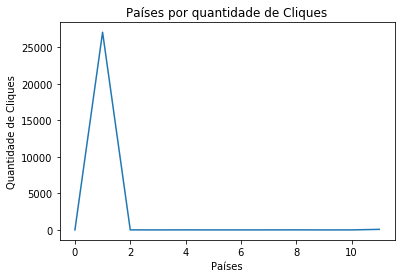

In [169]:
#Criação do Gráfico de Países com relação à quantidade de Cliques
country = taxi_app.groupby(["Country"], as_index=True)["Click ID"].count()
country_labels = padrao_colunas("Country")
country_data = dict(zip(country_labels,country.keys()))
pt.plot(country_labels, country.get_values());
pt.title("Países por quantidade de Cliques");
pt.xlabel("Países");
pt.ylabel("Quantidade de Cliques");

In [165]:
print("Legenda dos Valores:")
for i in country_data:
    print("Índice {0}: País {1}.".format(i, country_data[i]))

Legenda dos Valores:
Índice 0: País Postback Timestamp.
Índice 1: País Click ID.
Índice 2: País Transaction ID.
Índice 3: País Traffic Source ID.
Índice 4: País OS.
Índice 5: País Isp.
Índice 6: País Connection Type.
Índice 7: País IP.
Índice 8: País Site ID.


Com base nos dados de contagem e no gráfico acima, pode-se concluir que o país que possui a maior parte dos acessos ao produto é o *Brazil*, seguido de *United States*. Porém, tem países com baixíssimos acessos, como *Portugal* e *Costa Rica*, com apenas um acesso cada. O ideal seria uma maior campanha especialmente em países com menor número de acessos. Portanto, o atributo **Country** pode ser um fato significativo para a criação da próxima campanha. 

Agora, será analisado o atributo **Transaction ID**:

In [166]:
#Amostragem dos tipos de Transações realizadas
taxi_app.groupby(["Transaction ID"]).count()

,Postback Timestamp,Click ID,Country,Traffic Source ID,OS,Isp,Connection Type,IP,Site ID
Transaction ID,,,,,,,,,
card_added,1005,1005,1005,1005,1005,1005,1005,1005,1005
first_ride,693,693,693,693,693,693,693,693,693
install,25501,25501,25501,25501,25501,25501,25501,25501,25501


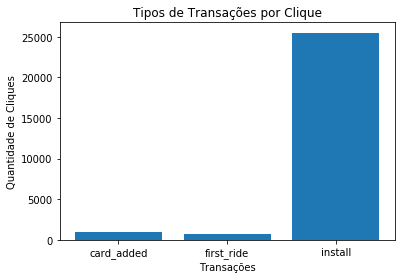

In [178]:
#Criação do gráfico de Tipos de Transações por Cliques
transaction = taxi_app.groupby(["Transaction ID"])["Click ID"].count()
pt.bar(transaction.keys(), transaction.get_values());
pt.title("Tipos de Transações por Clique");
pt.xlabel("Transações");
pt.ylabel("Quantidade de Cliques");

A maioria das Transações realizadas ocorreram em média por *Install*, seguido por *Card_Added* e *First_Ride*, respectivamente. A quantidade de dados com relação às *Novas Instalações*, no caso *Install*, comprova a necessidade do uso da estratégia de **Custo por Instalação**, por ser um método de alto uso pelos usuários. Porém, ainda há usuários que realizaram o cadastro de novos cartões de crédito

Ainda também, há o atributo **OS** a ser analisado:

In [179]:
#Amostragem dos tipos de Transações realizadas
taxi_app.groupby(["OS"]).count()

,Postback Timestamp,Click ID,Transaction ID,Country,Traffic Source ID,Isp,Connection Type,IP,Site ID
OS,,,,,,,,,
Android,26671,26671,26671,26671,26671,26671,26671,26671,26671
IOS,402,402,402,402,402,402,402,402,402
Other desktop OS,75,75,75,75,75,75,75,75,75
RIM OS,1,1,1,1,1,1,1,1,1
Windows,50,50,50,50,50,50,50,50,50


A maioria dos Sistemas Operacionais utilizados são *Sistemas Mobile*, sendo o principal o **Sistema Android**, seguido do **IOS**. 

In [180]:
#Amostragem dos tipos de Transações realizadas
taxi_app.groupby(["Connection Type"]).count()

,Postback Timestamp,Click ID,Transaction ID,Country,Traffic Source ID,OS,Isp,IP,Site ID
Connection Type,,,,,,,,,
Broadband,19307,19307,19307,19307,19307,19307,19307,19307,19307
Cable,13,13,13,13,13,13,13,13,13
Dialup,78,78,78,78,78,78,78,78,78
Mobile,7362,7362,7362,7362,7362,7362,7362,7362,7362
Satellite,32,32,32,32,32,32,32,32,32
Wireless,17,17,17,17,17,17,17,17,17
Xdsl,390,390,390,390,390,390,390,390,390


Nesse aspecto, a maior parte dos usuários utilizam a **Internet Banda Larga**, ou **Broadband**, como tipo de conexão para o acesso ao serviço, seguido da **Internet de Celular**, ou **Mobile**

In [181]:
#Amostragem dos tipos de Transações realizadas
taxi_app.groupby(["Traffic Source ID"]).count()

,Postback Timestamp,Click ID,Transaction ID,Country,OS,Isp,Connection Type,IP,Site ID
Traffic Source ID,,,,,,,,,
06305dce-21d8-4412-bc81-6b1f5ecf63c9,1531,1531,1531,1531,1531,1531,1531,1531,1531
0bab9113-87a4-4da8-8a46-c2d1f18ce4c8,1195,1195,1195,1195,1195,1195,1195,1195,1195
5cff49a9-50d7-4272-917f-614a822124de,597,597,597,597,597,597,597,597,597
69a52e19-d624-497f-a000-ca28df5e28a4,1,1,1,1,1,1,1,1,1
6b3d5dad-15d8-47a2-8109-2a85d80df0fc,656,656,656,656,656,656,656,656,656
7826a798-e3ce-4462-9248-900af565efff,1385,1385,1385,1385,1385,1385,1385,1385,1385
7982181f-6a20-4837-88e2-c332622f3d2a,5,5,5,5,5,5,5,5,5
874d21e1-a1f5-4848-8825-fcc21b1edc83,3,3,3,3,3,3,3,3,3
9a2a1675-584d-491d-9fc9-aeaa674c6e2d,20345,20345,20345,20345,20345,20345,20345,20345,20345
